In [104]:
from alan_lib import *
import matplotlib.pyplot as plt
import numpy as np
import math

# Question 1

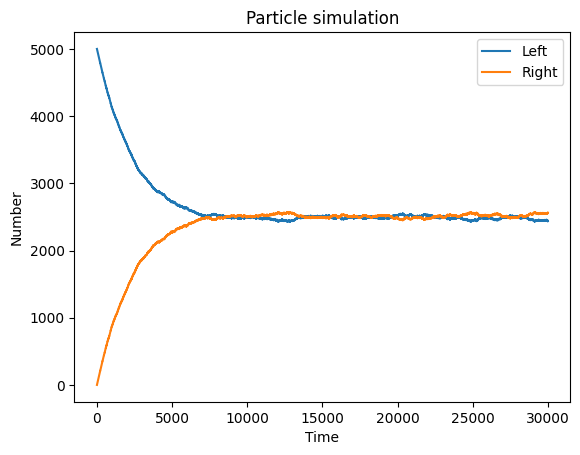

In [197]:
rng = RandSeq.lcg_rng

def simulate_particles(t, seed):
    Left, Right = [i for i in range(5001)], []
    Left_num, Right_num = [], []
    pick = rng(t, range = [0, 5000], seed=seed)#picking t random numbers between 0 and 5000
    for i in range(t):
        rand = int(pick[i])#chosing 1 out of 5000 particles
        if rand in Left:#then transfer it to right
            Left.remove(rand)
            Right.append(rand)            
        elif rand in Right:#then transfer it to left
            Right.remove(rand)
            Left.append(rand)
        Left_num.append(len(Left))#number of particles in left at all t values
        Right_num.append(len(Right))#number of particles in right at all t values
    return Left_num, Right_num

t = 30000#time
t_vals = [i for i in range(t)]
Lnum, Rnum = simulate_particles(t, 5)
plt.plot(t_vals, Lnum,label= 'Left')
plt.plot(t_vals, Rnum,label= 'Right')
plt.legend()
plt.ylabel('Number')
plt.xlabel('Time')
plt.title('Particle simulation')
plt.show()




# Question 2

In [158]:
A = [[4, -1, 0, -1, 0, 0],
[-1, 4, -1, 0, -1, 0],
[0, -1, 4, 0, 0, -1],
[-1, 0, 0, 4, -1, 0],
[0, -1, 0, -1, 4, -1],
[0, 0, -1, 0, -1, 4]
]

b = [2, 1, 2, 2, 1, 2]

x_GaussSeidel, count2 = LinAlg.Gauss_Seidel(A, b, e = 1e-6)
print(f'\nSolution using Gauss_Seidel in {count2} iterations:\n', x_GaussSeidel)


Solution using Gauss_Seidel in 16 iterations:
 [0.9999997530614102, 0.9999997892247294, 0.9999999100460266, 0.9999998509593769, 0.9999998727858708, 0.9999999457079743]


# Question 3

In [195]:
def f(x):
    return 2.5 - x*np.exp(x)

def df(x):
    return -np.exp(x)*(x+1)  

sol_, count = Linsolve.newton_raphson(f, df, 0)
sol = round(sol, 4)
print(f'The root of the function after {count} steps using newton_raphson: {sol}') 
print(f'The string can be streched: {sol} units')

The root of the function after 8 steps using newton_raphson: 0.9586
The string can be streched: 0.9586 units


# Ouestion 4

In [165]:
def weighted_density(x):
    return x**3

def density(x):
    return x**2

mass = Integrate.gaussian_quad(2, density, 0, 2)   
weighted_mass = Integrate.gaussian_quad(2, weighted_density, 0, 2)

com = weighted_mass/mass
print(f'Center of mass of the body is at: {round(com, 4)}m')

Center of mass of the body is at: 1.5m


# Question 5

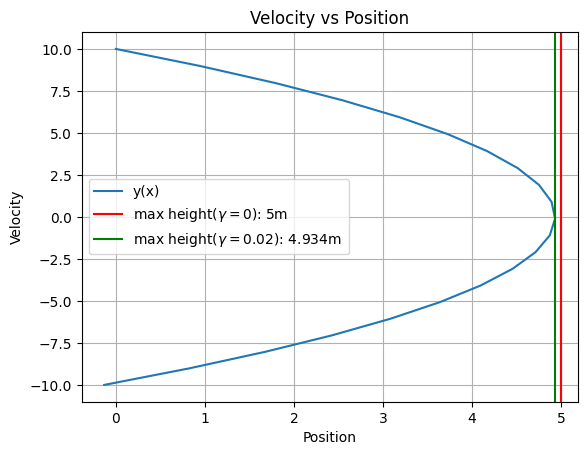

In [188]:
def x_dot(x, y):
    return y
def y_dot(x, y):
    return -0.02*y-10

Runge_kutta = Integrate.Runge_kutta_2d

x_vals, y_vals, t_vals = Runge_kutta(x_dot, y_dot, [0, 2.1], [0, 10])

# plt.plot(t_vals, x_vals, label = 'x(t)')
# plt.plot(t_vals, y_vals, label = 'y(t)')
plt.plot(x_vals, y_vals, label = 'y(x)')
max_height = round(max(x_vals),3)
# E = [(x**2 + y**2)/2 for x,y in zip(x_vals, y_vals)]
# plt.plot(t_vals, E, label = 'E(t)')
plt.grid(True)
plt.plot()
plt.title('Velocity vs Position')
plt.axvline(5, label=rf'max height($\gamma = 0$): 5m  ',color = 'r')
plt.axvline(max_height, label=rf'max height($\gamma = 0.02$): {max_height}m ', color = 'g')
plt.legend()
plt.ylabel('Velocity')
plt.xlabel('Position')
plt.show()


# Question 6

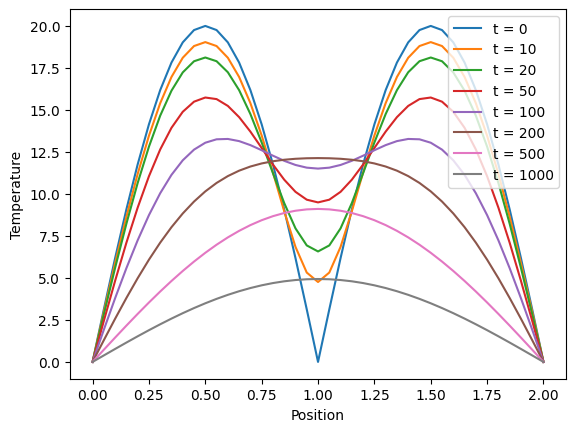

In [179]:
# PDE_solve = Integrate.PDE_solve

def PDE_solve(u0, boundary, N, hx=0.05, ht=0.0005):  # u0=initial profile function, boundary=[x_start,x_end], N=time steps, hx=space step, ht=time step
        start, end = boundary
        n = int(((end-start)/hx)+1)
        x_vals = [start + i*hx for i in range(n)]
        v = [u0(x) for x in x_vals]
        a = ht / hx**2
        A = Integrate.forward_matrix(n, a)
        soln = [v.copy()]

        for i in range(N):
            v[0], v[-1] = 0, 0           # enforce BC before
            v = LinAlg.matvec(A, v)      # matrix multiply
            v[0], v[-1] = 0, 0           # enforce BC after
            soln.append(v.copy())

        return soln, x_vals 
def u0(x):
    return 20*abs(np.sin(np.pi*x))


boundary = [0, 2]

sol, x = PDE_solve(u0, boundary, N=1000)
t_vals = [0, 10, 20, 50, 100, 200, 500, 1000]
sol1 = [sol[i] for i in (0, 10, 20, 50, 100, 200, 500, 1000)]
for v,t in zip(sol1,t_vals):
    plt.plot(x, v,label = f't = {t}')

plt.ylabel('Temperature')
plt.xlabel('Position')    
plt.legend()
plt.show()

# Question 7

In [181]:
x = [-2.00	,
-1.84	,
-1.68	,
-1.52	,
-1.36	,
-1.20	,
-1.04	,
-0.88	,
-0.72	,
-0.56	,
-0.40	,
-0.24	,
-0.08	,
0.08	,
0.24	, 
0.40	,
0.56	,
0.72	,
0.88	,
1.04	,
1.20	,
1.36	,
1.52	,
1.68	,
1.84	,
2.00	]

In [182]:
y =[	7.420,
	6.328,
	4.357,
	3.885,
	3.488,
	2.644,
	1.630,
	1.526,
	1.209,
	0.758,
	0.902,
	0.570,
	0.193,
	0.200,
	-0.428,
	-0.311,
	-0.467,
	-1.000,
	-1.676,
	-2.065,
	-3.201,
	-4.801,
	-5.382,
	-6.461,
	-8.355,
	-10.180]

Quadratic Fit: y = 0.25462950721154776 + -1.193759213809226 x + -0.4572554123829683 x2 +-0.8025653910658193 x3, 0.013239427477396381 x4


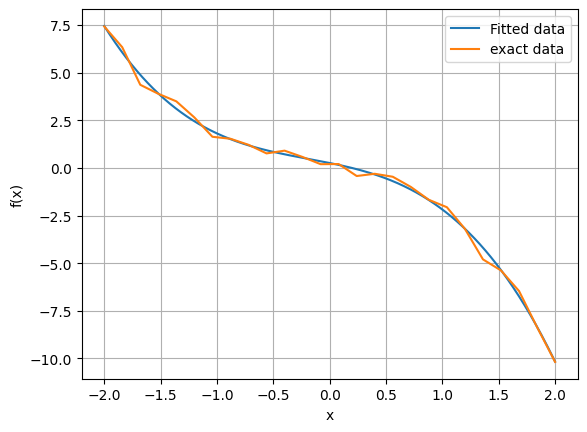

In [185]:
def quartic_least_square_fit(x, y):
    n = len(x)

    #summations
    Sx = sum(x)
    Sx2 = sum(xi**2 for xi in x)
    Sx3 = sum(xi**3 for xi in x)
    Sx4 = sum(xi**4 for xi in x)
    Sx5 = sum(xi**5 for xi in x)
    Sx6 = sum(xi**6 for xi in x)
    Sx7 = sum(xi**7 for xi in x)
    Sx8 = sum(xi**8 for xi in x)

    Sy = sum(y)
    Sxy = sum(x[i]*y[i] for i in range(n))
    Sx2y = sum((x[i]**2)*y[i] for i in range(n))
    Sx3y = sum((x[i]**3)*y[i] for i in range(n))
    Sx4y = sum((x[i]**4)*y[i] for i in range(n))

    #System of linear equations
    A = [
        [n, Sx, Sx2, Sx3, Sx4],
        [Sx, Sx2, Sx3, Sx4, Sx5],
        [Sx2, Sx3, Sx4, Sx5, Sx6],
        [Sx3, Sx4, Sx5, Sx6, Sx7],
        [Sx4, Sx5, Sx6, Sx7, Sx8]
    ]
    B = [Sy, Sxy, Sx2y, Sx3y, Sx4y]

    gauss_jordan = LinAlg.gauss_jordan
    sol = gauss_jordan(A, B)
    return sol['Solution']


poly = quartic_least_square_fit(x, y)
a0, a1, a2, a3, a4 = poly
print(f"Quadratic Fit: y = {a0} + {a1} x + {a2} x2 +{a3} x3, {a4} x4")

def Poly(x):
    return 0.2546 + -1.1938*x + -0.4573*x**2 +-0.8026*x**3+ 0.0132*x**4
    # return Linsolve.function_list(poly, x)  

x_vals = [-2+i*0.001 for i in range(int(4/0.001))]
polyval = [Poly(i) for i in x_vals]

plt.plot(x_vals, polyval, label='Fitted data')
plt.plot(x, y, label='exact data')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.show()